     appid                                               name  \
0  1661900  Human Apocalypse - Reverse Horror Zombie Indie...   
1   292000                             No More Room In Hell 2   
2   108600                                    Project Zomboid   
3  1456940                                            Level Z   
4  1809540                                          Nine Sols   

           developer             publisher  score_rank  positive  negative  \
0  Euphoric Brothers     Euphoric Brothers         NaN        50        17   
1        Lever Games           Lever Games         NaN         0         0   
2    The Indie Stone       The Indie Stone         NaN    281805     17554   
3      DogHowl Games  Creative Black Chair         NaN         0         0   
4     RedCandleGames        RedCandleGames         NaN      3989       262   

   userscore                    owners  average_forever  average_2weeks  \
0          0               0 .. 20,000                0          

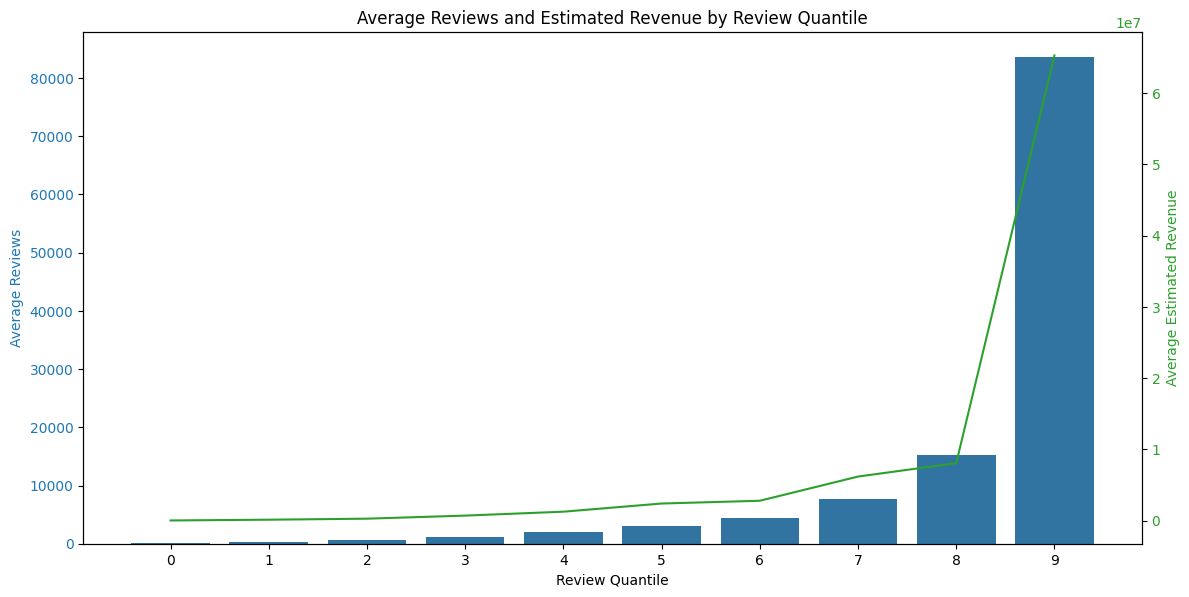

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Display the first few rows of the dataframe to understand its structure
print(games_df.head())

# Data Cleaning
# Drop rows with missing values in positive, negative, or price columns
games_df.dropna(subset=['positive', 'negative', 'price'], inplace=True)

# Convert relevant columns to appropriate data types
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)

# Ensure price is in the correct units (dollars instead of cents)
games_df['price'] = games_df['price'] / 100  # Assuming price is in cents, convert to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']

# Filter out rows where reviews are zero
games_df = games_df[games_df['reviews'] > 0]

# Assume 2% of buyers leave a review, so the factor is 50
review_factor = 50

# Estimate revenue
games_df['estimated_revenue'] = games_df['reviews'] * review_factor * games_df['price']

# Check for unique values in the reviews column
unique_reviews = games_df['reviews'].nunique()
print(f"Unique review values: {unique_reviews}")

# Data Analysis
# Reduce the number of quantiles if there are not enough unique values
num_quantiles = min(10, unique_reviews)

# Calculate quantiles for reviews and estimated revenue
if num_quantiles > 1:
    games_df['review_quantile'] = pd.qcut(games_df['reviews'], num_quantiles, labels=False, duplicates='drop')
    games_df['revenue_quantile'] = pd.qcut(games_df['estimated_revenue'], num_quantiles, labels=False, duplicates='drop')

    # Group by review quantile and calculate statistics
    review_stats = games_df.groupby('review_quantile').agg({
        'reviews': ['mean', 'median'],
        'estimated_revenue': ['mean', 'median'],
        'price': ['mean', 'median']
    }).reset_index()

    review_stats.columns = ['review_quantile', 'mean_reviews', 'median_reviews', 'mean_estimated_revenue', 'median_estimated_revenue', 'mean_price', 'median_price']

    # Display the statistics
    print(review_stats)

    # Data Visualization
    # Plot average reviews and estimated revenue by review quantile
    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Review Quantile')
    ax1.set_ylabel('Average Reviews', color=color)
    sns.barplot(x=review_stats['review_quantile'], y=review_stats['mean_reviews'], ax=ax1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('Average Estimated Revenue', color=color)
    sns.lineplot(x=review_stats['review_quantile'], y=review_stats['mean_estimated_revenue'], ax=ax2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Average Reviews and Estimated Revenue by Review Quantile')
    plt.show()
else:
    print("Not enough unique review values to create quantiles.")



     appid                                               name  \
0  1661900  Human Apocalypse - Reverse Horror Zombie Indie...   
1   292000                             No More Room In Hell 2   
2   108600                                    Project Zomboid   
3  1456940                                            Level Z   
4  2625510                              Don't Scream Together   

           developer             publisher  score_rank  positive  negative  \
0  Euphoric Brothers     Euphoric Brothers         NaN        50        17   
1        Lever Games           Lever Games         NaN         0         0   
2    The Indie Stone       The Indie Stone         NaN    281805     17554   
3      DogHowl Games  Creative Black Chair         NaN         0         0   
4                NaN                   NaN         NaN         0         0   

   userscore                    owners  average_forever  average_2weeks  \
0          0               0 .. 20,000                0          

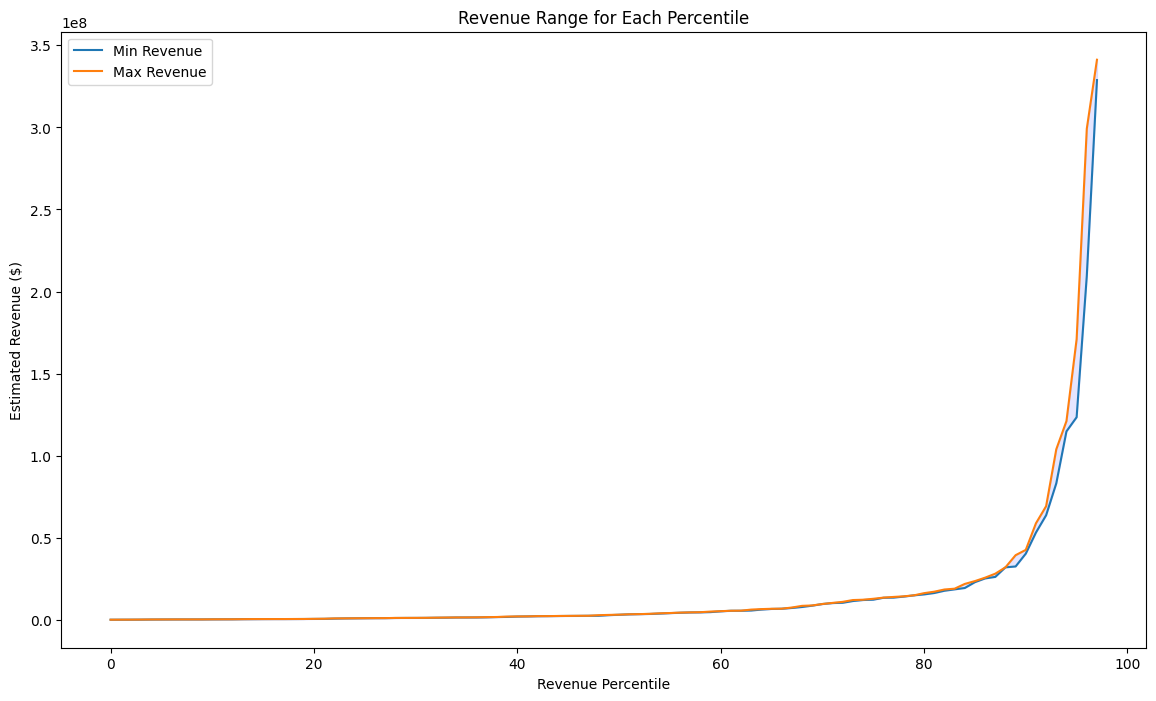

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Display the first few rows of the dataframe to understand its structure
print(games_df.head())

# Data Cleaning
# Drop rows with missing values in positive, negative, or price columns
games_df.dropna(subset=['positive', 'negative', 'price'], inplace=True)

# Convert relevant columns to appropriate data types
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)

# Ensure price is in the correct units (dollars instead of cents)
games_df['price'] = games_df['price'] / 100  # Assuming price is in cents, convert to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']

# Filter out rows where reviews are zero
games_df = games_df[games_df['reviews'] > 0]

# Assume 2% of buyers leave a review, so the factor is 50
review_factor = 50

# Estimate revenue
games_df['estimated_revenue'] = games_df['reviews'] * review_factor * games_df['price']

# Check for unique values in the reviews column
unique_reviews = games_df['reviews'].nunique()
print(f"Unique review values: {unique_reviews}")

# Data Analysis
# Calculate quantiles for estimated revenue
num_quantiles = 100  # Divide into percentiles
games_df['revenue_percentile'] = pd.qcut(games_df['estimated_revenue'], num_quantiles, labels=False, duplicates='drop')

# Group by revenue percentile and calculate the revenue range (min and max)
revenue_range = games_df.groupby('revenue_percentile')['estimated_revenue'].agg(['min', 'max']).reset_index()

# Convert revenue range to full numbers
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))

# Display the revenue range for each percentile
print(revenue_range)

# Data Visualization
# Plot the revenue range for each percentile
plt.figure(figsize=(14, 8))
sns.lineplot(data=revenue_range, x='revenue_percentile', y='min', label='Min Revenue')
sns.lineplot(data=revenue_range, x='revenue_percentile', y='max', label='Max Revenue')
plt.fill_between(revenue_range['revenue_percentile'], revenue_range['min'], revenue_range['max'], color='blue', alpha=0.1)
plt.title('Revenue Range for Each Percentile')
plt.xlabel('Revenue Percentile')
plt.ylabel('Estimated Revenue ($)')
plt.legend()
plt.show()


In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Display the first few rows of the dataframe to understand its structure
print(games_df.head())

# Data Cleaning
# Drop rows with missing values in positive, negative, or price columns
games_df.dropna(subset=['positive', 'negative', 'price'], inplace=True)

# Convert relevant columns to appropriate data types
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)

# Ensure price is in the correct units (dollars instead of cents)
games_df['price'] = games_df['price'] / 100  # Assuming price is in cents, convert to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']

# Filter out rows where reviews are zero
games_df = games_df[games_df['reviews'] > 0]

# Assume 2% of buyers leave a review, so the factor is 50
review_factor = 50

# Estimate revenue
games_df['estimated_revenue'] = games_df['reviews'] * review_factor * games_df['price']

# Filter out rows where estimated revenue is zero
games_df = games_df[games_df['estimated_revenue'] > 0]

# Check for unique values in the reviews column
unique_reviews = games_df['reviews'].nunique()
print(f"Unique review values: {unique_reviews}")

# Data Analysis
# Reduce the number of quantiles if there are not enough unique values
num_quantiles = min(10, unique_reviews)

# Calculate quantiles for reviews
games_df['review_quantile'] = pd.qcut(games_df['reviews'], num_quantiles, labels=False, duplicates='drop')

# Group by review quantile and calculate the revenue range (min and max)
revenue_range = games_df.groupby('review_quantile')['estimated_revenue'].agg(['min', 'max']).reset_index()

# Convert revenue range to full numbers and format as strings
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)


# Optionally, print each range individually
for index, row in revenue_range.iterrows():
    print(f"Review Quantile {row['review_quantile']}: {row['range']}")


     appid                                               name  \
0  1661900  Human Apocalypse - Reverse Horror Zombie Indie...   
1   292000                             No More Room In Hell 2   
2   108600                                    Project Zomboid   
3  1456940                                            Level Z   
4  2625510                              Don't Scream Together   

           developer             publisher  score_rank  positive  negative  \
0  Euphoric Brothers     Euphoric Brothers         NaN        50        17   
1        Lever Games           Lever Games         NaN         0         0   
2    The Indie Stone       The Indie Stone         NaN    281805     17554   
3      DogHowl Games  Creative Black Chair         NaN         0         0   
4                NaN                   NaN         NaN         0         0   

   userscore                    owners  average_forever  average_2weeks  \
0          0               0 .. 20,000                0          

Review Quantile 0: $1,287 - $184,963
Review Quantile 1: $4,092 - $537,285
Review Quantile 2: $13,452 - $797,181
Review Quantile 3: $71,421 - $1,639,344
Review Quantile 4: $257,140 - $3,319,893
Review Quantile 5: $387,952 - $6,706,323
Review Quantile 6: $493,420 - $7,783,526
Review Quantile 7: $572,921 - $18,409,396
Review Quantile 8: $468,914 - $22,898,864
Review Quantile 9: $1,603,305 - $341,240,604


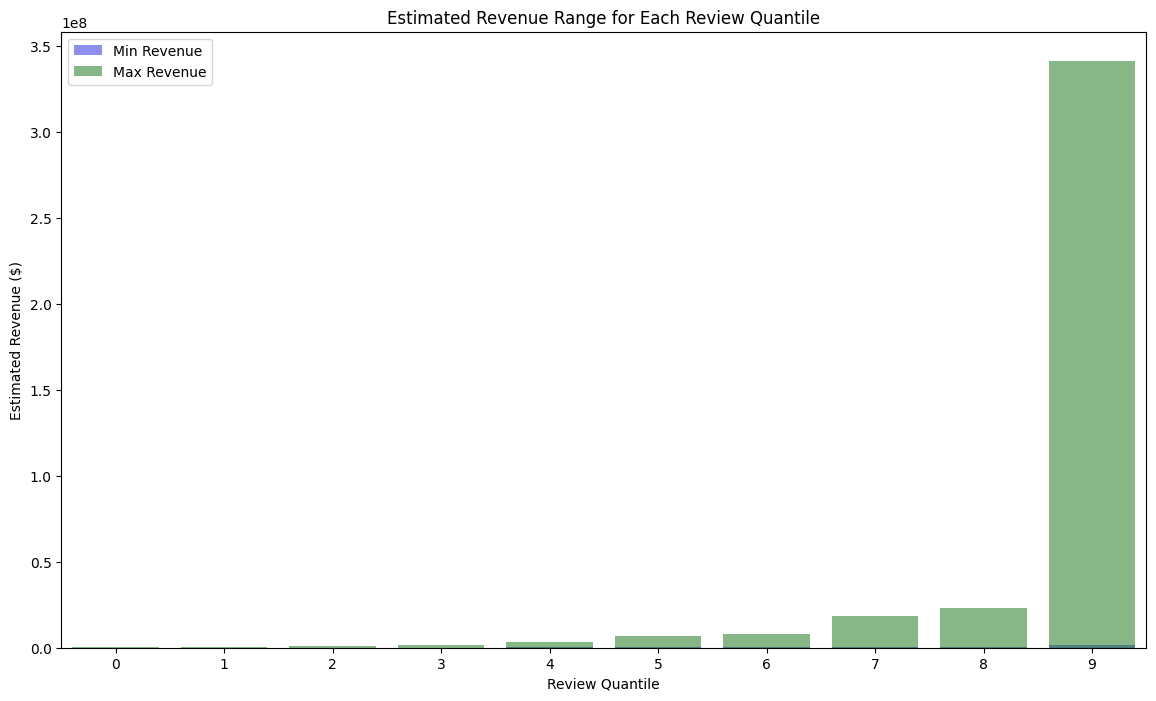

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']
games_df = games_df[games_df['reviews'] > 0]

# Assume 2% of buyers leave a review, so the factor is 50
review_factor = 50

# Estimate revenue
games_df['estimated_revenue'] = games_df['reviews'] * review_factor * games_df['price']
games_df = games_df[games_df['estimated_revenue'] > 0]

# Calculate review quantiles
num_quantiles = min(10, games_df['reviews'].nunique())
games_df['review_quantile'] = pd.qcut(games_df['reviews'], num_quantiles, labels=False, duplicates='drop')

# Calculate the revenue range for each quantile
revenue_range = games_df.groupby('review_quantile')['estimated_revenue'].agg(['min', 'max']).reset_index()
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)

# Print each range individually
for index, row in revenue_range.iterrows():
    print(f"Review Quantile {row['review_quantile']}: {row['range']}")

# Visualize the revenue range
plt.figure(figsize=(14, 8))
sns.barplot(x=revenue_range['review_quantile'], y=revenue_range['min'], color='blue', alpha=0.5, label='Min Revenue')
sns.barplot(x=revenue_range['review_quantile'], y=revenue_range['max'], color='green', alpha=0.5, label='Max Revenue')
plt.xlabel('Review Quantile')
plt.ylabel('Estimated Revenue ($)')
plt.title('Estimated Revenue Range for Each Review Quantile')
plt.legend()
plt.show()


Top 10 publishers by number of games:
publisher
Gun Interactive            14
Rusty Lake                  8
Scott Cawthon               7
MangaGamer                  7
Kagura Games                6
Notovia                     5
Glowstick Entertainment     5
Fireproof Games             5
PLAYISM                     5
Chilla's Art                4
Name: count, dtype: int64

Top 10 publishers by number of positive reviews:
publisher
Klei Entertainment            437300
The Indie Stone               281805
Studio Minus                  243688
Annapurna Interactive         237721
Team Salvato                  192225
Scott Cawthon                 175138
Electronic Arts               156128
BANDAI NAMCO Entertainment    129348
Red Hook Studios              125334
Red Barrels                   113190
Name: positive, dtype: int64


/tmp/ipykernel_56375/1441088189.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="viridis")


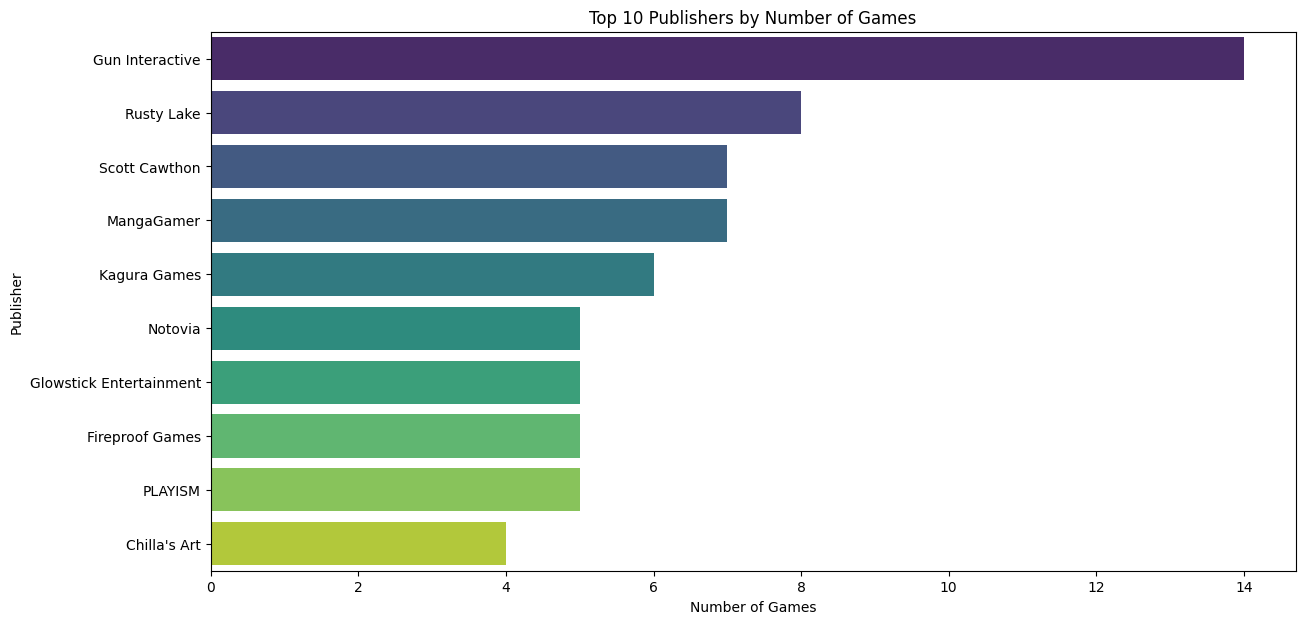

/tmp/ipykernel_56375/1441088189.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_success.values, y=publisher_success.index, palette="viridis")


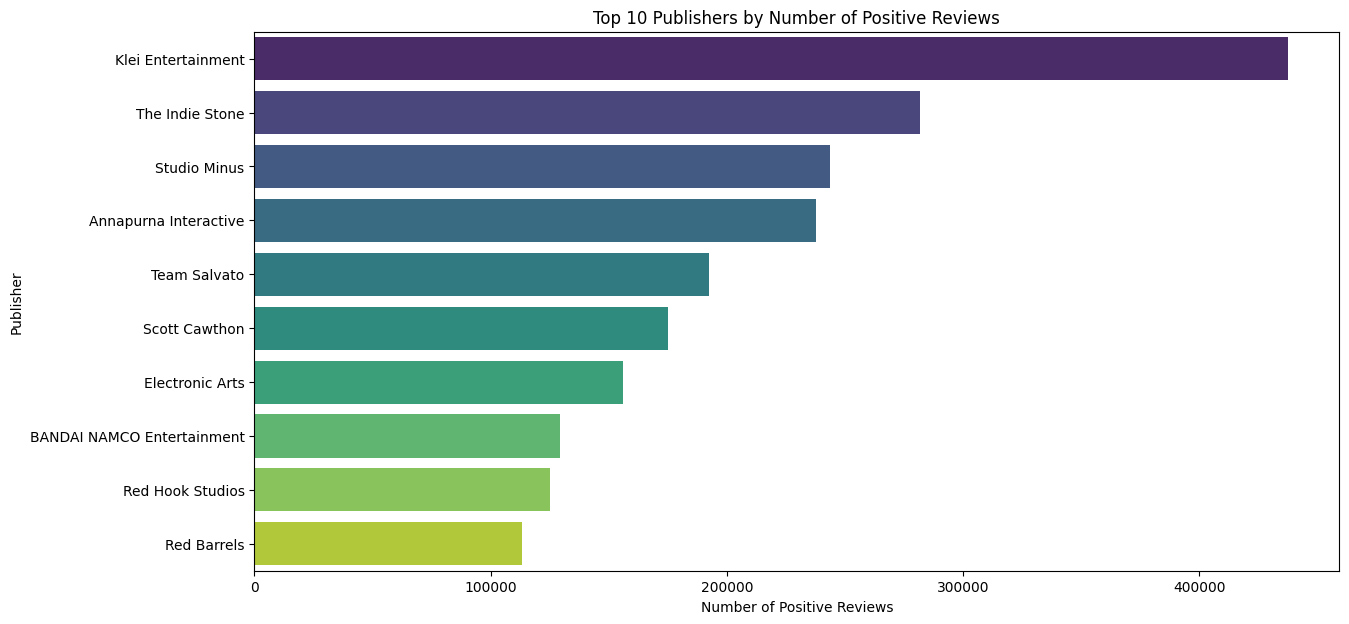

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data
data_dir = '../data'
games_df = pd.read_csv(os.path.join(data_dir, 'indie_horror_games_data.csv'))

# Analyze publishers by number of games published
publisher_counts = games_df['publisher'].value_counts()
top_publishers = publisher_counts.head(10)

print("Top 10 publishers by number of games:")
print(top_publishers)

# Analyze publishers by success (using positive reviews as a proxy for success)
publisher_success = games_df.groupby('publisher')['positive'].sum().sort_values(ascending=False).head(10)

print("\nTop 10 publishers by number of positive reviews:")
print(publisher_success)

# Plot the top 10 publishers by number of games published
plt.figure(figsize=(14, 7))
sns.barplot(x=top_publishers.values, y=top_publishers.index, hue=top_publishers.index, dodge=False, palette="viridis", legend=False)
plt.title('Top 10 Publishers by Number of Games')
plt.xlabel('Number of Games')
plt.ylabel('Publisher')
plt.show()

# Plot the top 10 publishers by number of positive reviews
plt.figure(figsize=(14, 7))
sns.barplot(x=publisher_success.values, y=publisher_success.index, hue=publisher_success.index, dodge=False, palette="viridis", legend=False)
plt.title('Top 10 Publishers by Number of Positive Reviews')
plt.xlabel('Number of Positive Reviews')
plt.ylabel('Publisher')
plt.show()

# Save the analysis results
top_publishers.to_csv(os.path.join(data_dir, 'top_publishers_by_games.csv'))
publisher_success.to_csv(os.path.join(data_dir, 'top_publishers_by_success.csv'))
